In [26]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,StandardScaler

In [28]:
df = pd.read_csv('subset_1.csv')


In [30]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [32]:
df.tail()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
249995,East,Peaty,Soybean,361.950660,17.325910,False,True,Sunny,110,3.095497
249996,North,Peaty,Wheat,737.685255,36.685394,True,False,Cloudy,61,6.044170
249997,South,Sandy,Cotton,649.794533,34.168921,False,True,Rainy,86,5.114321
249998,South,Clay,Cotton,665.270835,19.720276,True,True,Rainy,109,6.763628
249999,South,Loam,Rice,384.686624,18.821572,True,False,Rainy,134,4.284467


In [34]:
df.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,250000.000000,250000.000000,250000.000000,250000.000000
mean,549.779236,27.516425,104.417064,4.648321
std,259.633175,7.212760,25.955176,1.695283
min,100.006387,15.000126,60.000000,-0.841617
25%,324.809275,21.265774,82.000000,3.418742
50%,550.449788,27.558672,104.000000,4.649908
75%,773.535543,33.764054,127.000000,5.874230
max,999.996116,39.999700,149.000000,9.727004


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  250000 non-null  object 
 1   Soil_Type               250000 non-null  object 
 2   Crop                    250000 non-null  object 
 3   Rainfall_mm             250000 non-null  float64
 4   Temperature_Celsius     250000 non-null  float64
 5   Fertilizer_Used         250000 non-null  bool   
 6   Irrigation_Used         250000 non-null  bool   
 7   Weather_Condition       250000 non-null  object 
 8   Days_to_Harvest         250000 non-null  int64  
 9   Yield_tons_per_hectare  250000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 15.7+ MB


In [38]:
df.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [40]:
df.duplicated().sum()

0

In [42]:
df.dtypes

Region                     object
Soil_Type                  object
Crop                       object
Rainfall_mm               float64
Temperature_Celsius       float64
Fertilizer_Used              bool
Irrigation_Used              bool
Weather_Condition          object
Days_to_Harvest             int64
Yield_tons_per_hectare    float64
dtype: object

In [44]:
df = df.drop(columns=['Region']) 

In [46]:
df.head()

,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [48]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [50]:
df['Soil_Type'] = label_encoder.fit_transform(df['Soil_Type'])
df['Crop'] = label_encoder.fit_transform(df['Crop'])
df['Weather_Condition'] = label_encoder.fit_transform(df['Weather_Condition'])
df['Irrigation_Used'] = label_encoder.fit_transform(df['Irrigation_Used'])
df['Fertilizer_Used'] = label_encoder.fit_transform(df['Fertilizer_Used'])

In [52]:
df.head()

,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,4,1,897.077239,27.676966,0,1,0,122,6.555816
1,1,3,992.673282,18.026142,1,1,1,140,8.527341
2,2,0,147.998025,29.794042,0,0,2,106,1.127443
3,4,4,986.866331,16.644190,0,1,1,146,6.517573
4,5,5,730.379174,31.620687,1,1,0,110,7.248251


In [54]:
df1=df.copy()
df2=df.copy()

In [56]:
df2.head()

,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,4,1,897.077239,27.676966,0,1,0,122,6.555816
1,1,3,992.673282,18.026142,1,1,1,140,8.527341
2,2,0,147.998025,29.794042,0,0,2,106,1.127443
3,4,4,986.866331,16.644190,0,1,1,146,6.517573
4,5,5,730.379174,31.620687,1,1,0,110,7.248251


In [58]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df3 = scaler.fit_transform(df1)

# Convert the result back to a DataFrame with column names from df2
df3 = pd.DataFrame(df3, columns=df1.columns)

# Display the standardized DataFrame
print(df3)


        Soil_Type      Crop  Rainfall_mm  Temperature_Celsius  \
0        0.878477 -0.880705     1.337651             0.022258   
1       -0.878927  0.291521     1.705849            -1.315766   
2       -0.293126 -1.466818    -1.547499             0.315777   
3        0.878477  0.877634     1.683483            -1.507364   
4        1.464279  1.463746     0.695598             0.569029   
...           ...       ...          ...                  ...   
249995   0.292676  0.877634    -0.723440            -1.412848   
249996   0.292676  1.463746     0.723738             1.271218   
249997   0.878477 -0.880705     0.385218             0.922325   
249998  -0.878927 -0.880705     0.444827            -1.080885   
249999  -0.293126  0.291521    -0.635870            -1.205484   

        Fertilizer_Used  Irrigation_Used  Weather_Condition  Days_to_Harvest  \
0             -0.999544         1.000544          -1.226737         0.677436   
1              1.000456         1.000544          -0.002361

In [60]:
df3.head()

,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,0.878477,-0.880705,1.337651,0.022258,-0.999544,1.000544,-1.226737,0.677436,1.125180
1,-0.878927,0.291521,1.705849,-1.315766,1.000456,1.000544,-0.002361,1.370941,2.288130
2,-0.293126,-1.466818,-1.547499,0.315777,-0.999544,-0.999456,1.222016,0.060987,-2.076871
3,0.878477,0.877634,1.683483,-1.507364,-0.999544,1.000544,-0.002361,1.602109,1.102621
4,1.464279,1.463746,0.695598,0.569029,1.000456,1.000544,-1.226737,0.215100,1.533629


In [62]:
df.corr()

,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
Soil_Type,1.000000,-0.002782,-0.000979,-0.001628,0.001647,-0.001785,0.002355,0.001663,-0.000592
Crop,-0.002782,1.000000,-0.001695,0.000572,0.000441,-0.000831,-0.002604,0.001267,-0.002111
Rainfall_mm,-0.000979,-0.001695,1.000000,-0.001210,0.002450,-0.002884,-0.000387,-0.002661,0.764460
Temperature_Celsius,-0.001628,0.000572,-0.001210,1.000000,0.001487,0.002442,-0.001953,0.000931,0.085515
Fertilizer_Used,0.001647,0.000441,0.002450,0.001487,1.000000,0.001256,0.000775,0.000700,0.444764
Irrigation_Used,-0.001785,-0.000831,-0.002884,0.002442,0.001256,1.000000,-0.001155,-0.002123,0.352328
Weather_Condition,0.002355,-0.002604,-0.000387,-0.001953,0.000775,-0.001155,1.000000,0.000537,-0.000201
Days_to_Harvest,0.001663,0.001267,-0.002661,0.000931,0.000700,-0.002123,0.000537,1.000000,-0.001872
Yield_tons_per_hectare,-0.000592,-0.002111,0.764460,0.085515,0.444764,0.352328,-0.000201,-0.001872,1.000000


In [64]:
X = df3.drop(['Yield_tons_per_hectare'],axis=1)
y = df3['Yield_tons_per_hectare']

In [66]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.20, random_state=5)

# LInear reggresion

In [69]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
reg = linear_model.LinearRegression()

In [71]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [73]:
pred = reg.predict(xtest)

In [75]:
acc = r2_score(ytest, pred)
acc

0.913148911981898

In [77]:
rms = mean_squared_error(ytest, pred, squared=False)
rms

0.29473679166733185

In [79]:
MSE = np.square(np.subtract(ytest,pred)).mean() 
MSE

0.08686977636235217

# DESCION TREE

In [68]:
from sklearn import tree


In [70]:
clf = tree.DecisionTreeRegressor()
clf=clf.fit(xtrain,ytrain)

In [73]:
pread2=clf.predict(xtest)

In [76]:
acc2 = r2_score(ytest, pread2)
acc2

0.8133005870107421

In [80]:
rms = mean_squared_error(ytest, pread2, squared=False)
rms

0.43213375982717545

In [83]:
MSE = np.square(np.subtract(ytest,pread2)).mean() 
MSE

0.18673958638237095

# Random Forest

In [87]:
from sklearn.ensemble import RandomForestRegressor
ram=RandomForestRegressor()
ram=ram.fit(xtrain,ytrain)

In [90]:
pread3=ram.predict(xtest)

In [93]:
acc3= r2_score(ytest, pread3)
acc3


0.9059519790958102

In [98]:
MSE = np.square(np.subtract(ytest,pread3)).mean() 
MSE

0.09406825786184707

In [101]:
rms = mean_squared_error(ytest, pread3, squared=False)
rms

0.30670549043316303

# BOOSTING

In [104]:
from sklearn.ensemble import GradientBoostingRegressor
boost=GradientBoostingRegressor()
boost=boost.fit(xtrain,ytrain)
pread4=boost.predict(xtest)
acc4=r2_score(ytest, pread4)
acc4

0.9125951466202384

In [108]:
MSE = np.square(np.subtract(ytest,pread4)).mean() 
MSE

0.08742366088150239

In [111]:
rms = mean_squared_error(ytest, pread4, squared=False)
rms

0.2956749243366816

# BAGGING

In [117]:
from sklearn.ensemble import BaggingRegressor
bag=BaggingRegressor()
bag=bag.fit(xtrain,ytrain)
pread5=bag.predict(xtest)
acc5=r2_score(ytest, pread5)
acc

0.913148911981898

In [120]:
MSE = np.square(np.subtract(ytest,pread5)).mean()
MSE

0.102771622574392

In [123]:
rms = mean_squared_error(ytest, pread5, squared=False)
rms

0.3205801344038523

R2 score of Linear Regression: 0.913148911981898
R2 score of Gradient Boosting Regressor: 0.9125951466202384
R2 score of Ensemble Model: 0.9130212035073741
MSE of Linear Regression: 0.08686977636235217
MSE of Gradient Boosting Regressor: 0.0874236608815024
MSE of Ensemble Model: 0.0869975123167843
RMSE of Linear Regression: 0.29473679166733185
RMSE of Gradient Boosting Regressor: 0.29567492433668163
RMSE of Ensemble Model: 0.29495340702691386


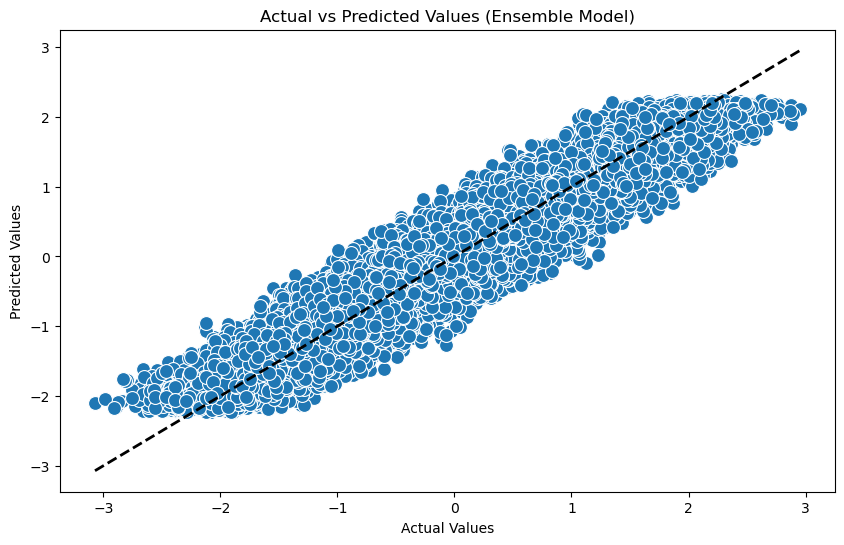

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the models
linear_model = LinearRegression()
boosting_model = GradientBoostingRegressor()

# Fit the models
linear_model.fit(xtrain, ytrain)
boosting_model.fit(xtrain, ytrain)

# Make predictions on the test data
pred_linear = linear_model.predict(xtest)
pred_boosting = boosting_model.predict(xtest)

# Combine predictions by averaging
pred_ensemble = (pred_linear + pred_boosting) / 2

# Evaluate the models
r2_linear = r2_score(ytest, pred_linear)
r2_boosting = r2_score(ytest, pred_boosting)
r2_ensemble = r2_score(ytest, pred_ensemble)

mse_linear = mean_squared_error(ytest, pred_linear)
mse_boosting = mean_squared_error(ytest, pred_boosting)
mse_ensemble = mean_squared_error(ytest, pred_ensemble)

rmse_linear = np.sqrt(mse_linear)
rmse_boosting = np.sqrt(mse_boosting)
rmse_ensemble = np.sqrt(mse_ensemble)

print(f"R2 score of Linear Regression: {r2_linear}")
print(f"R2 score of Gradient Boosting Regressor: {r2_boosting}")
print(f"R2 score of Ensemble Model: {r2_ensemble}")

print(f"MSE of Linear Regression: {mse_linear}")
print(f"MSE of Gradient Boosting Regressor: {mse_boosting}")
print(f"MSE of Ensemble Model: {mse_ensemble}")

print(f"RMSE of Linear Regression: {rmse_linear}")
print(f"RMSE of Gradient Boosting Regressor: {rmse_boosting}")
print(f"RMSE of Ensemble Model: {rmse_ensemble}")

# Scatter plot of predicted vs. actual values for the ensemble model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ytest, y=pred_ensemble, edgecolor='w', s=100)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Ensemble Model)')
plt.show()


R2 score of Linear Regression: 0.913148911981898
R2 score of Random Forest Regressor: 0.9057569267235517
R2 score of Ensemble Model: 0.9112282043499562
MSE of Linear Regression: 0.08686977636235217
MSE of Random Forest Regressor: 0.09426335220486222
MSE of Ensemble Model: 0.08879089728612767
RMSE of Linear Regression: 0.29473679166733185
RMSE of Random Forest Regressor: 0.307023374036672
RMSE of Ensemble Model: 0.2979780147697606


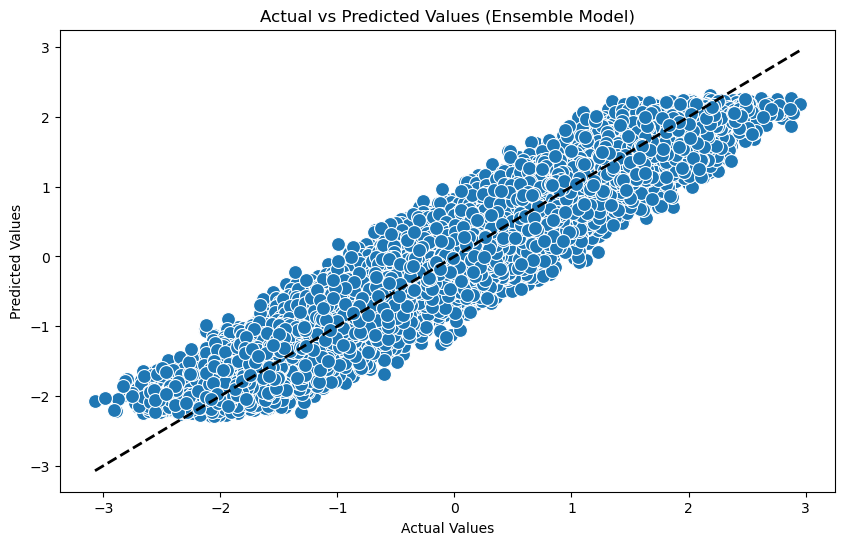

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the models
linear_model = LinearRegression()
rf_model = RandomForestRegressor()

# Fit the models
linear_model.fit(xtrain, ytrain)
rf_model.fit(xtrain, ytrain)

# Make predictions on the test data
pred_linear = linear_model.predict(xtest)
pred_rf = rf_model.predict(xtest)

# Combine predictions by averaging
pred_ensemble = (pred_linear + pred_rf) / 2

# Evaluate the models
r2_linear = r2_score(ytest, pred_linear)
r2_rf = r2_score(ytest, pred_rf)
r2_ensemble = r2_score(ytest, pred_ensemble)

mse_linear = mean_squared_error(ytest, pred_linear)
mse_rf = mean_squared_error(ytest, pred_rf)
mse_ensemble = mean_squared_error(ytest, pred_ensemble)

rmse_linear = np.sqrt(mse_linear)
rmse_rf = np.sqrt(mse_rf)
rmse_ensemble = np.sqrt(mse_ensemble)

print(f"R2 score of Linear Regression: {r2_linear}")
print(f"R2 score of Random Forest Regressor: {r2_rf}")
print(f"R2 score of Ensemble Model: {r2_ensemble}")

print(f"MSE of Linear Regression: {mse_linear}")
print(f"MSE of Random Forest Regressor: {mse_rf}")
print(f"MSE of Ensemble Model: {mse_ensemble}")

print(f"RMSE of Linear Regression: {rmse_linear}")
print(f"RMSE of Random Forest Regressor: {rmse_rf}")
print(f"RMSE of Ensemble Model: {rmse_ensemble}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=ytest, y=pred_ensemble, edgecolor='w', s=100)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Ensemble Model)')
plt.show()


R2 score of Linear Regression: 0.913148911981898
R2 score of Random Forest Regressor: 0.9056428502615425
R2 score of Ensemble Model: 0.9111780774616042
MSE of Linear Regression: 0.08686977636235217
MSE of Random Forest Regressor: 0.09437745321348609
MSE of Ensemble Model: 0.08884103496062604
RMSE of Linear Regression: 0.29473679166733185
RMSE of Random Forest Regressor: 0.30720913595380933
RMSE of Ensemble Model: 0.29806213271837473


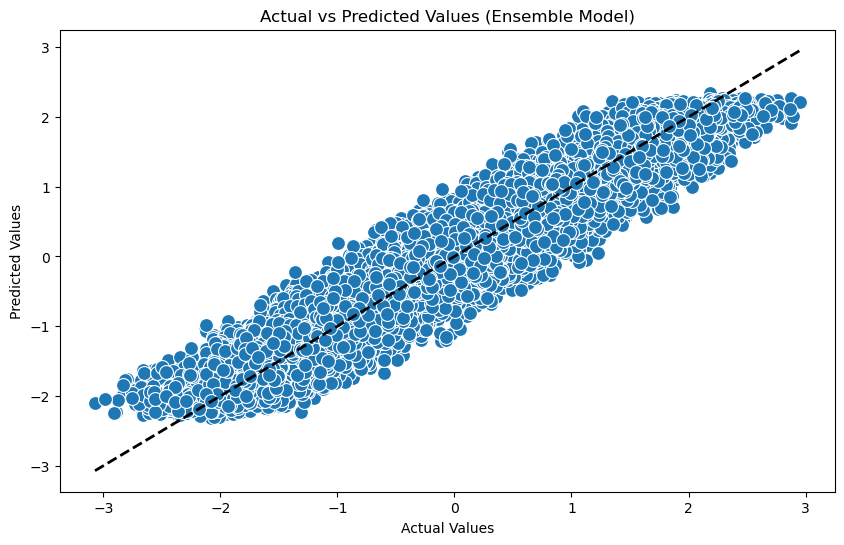

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the models
linear_model = LinearRegression()
rf_model = RandomForestRegressor()

# Fit the models
linear_model.fit(xtrain, ytrain)
rf_model.fit(xtrain, ytrain)

# Make predictions on the test data
pred_linear = linear_model.predict(xtest)
pred_rf = rf_model.predict(xtest)

# Combine predictions by averaging
pred_ensemble = (pred_linear + pred_rf) / 2

# Evaluate the models
r2_linear = r2_score(ytest, pred_linear)
r2_rf = r2_score(ytest, pred_rf)
r2_ensemble = r2_score(ytest, pred_ensemble)

mse_linear = mean_squared_error(ytest, pred_linear)
mse_rf = mean_squared_error(ytest, pred_rf)
mse_ensemble = mean_squared_error(ytest, pred_ensemble)

rmse_linear = np.sqrt(mse_linear)
rmse_rf = np.sqrt(mse_rf)
rmse_ensemble = np.sqrt(mse_ensemble)

print(f"R2 score of Linear Regression: {r2_linear}")
print(f"R2 score of Random Forest Regressor: {r2_rf}")
print(f"R2 score of Ensemble Model: {r2_ensemble}")

print(f"MSE of Linear Regression: {mse_linear}")
print(f"MSE of Random Forest Regressor: {mse_rf}")
print(f"MSE of Ensemble Model: {mse_ensemble}")

print(f"RMSE of Linear Regression: {rmse_linear}")
print(f"RMSE of Random Forest Regressor: {rmse_rf}")
print(f"RMSE of Ensemble Model: {rmse_ensemble}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=ytest, y=pred_ensemble, edgecolor='w', s=100)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Ensemble Model)')
plt.show()


In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.ensemble import StackingRegressor

# Assuming xtrain, ytrain, xtest, ytest are already defined

# Define base models
base_models = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features='log2', max_depth=40, bootstrap=True))
]

# Define stacking ensemble model
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(),
    cv=5
)

# Fit the stacking model
stacking_model.fit(xtrain, ytrain)

# Make predictions
pred_stack = stacking_model.predict(xtest)

# Evaluate the model
r2_stack = r2_score(ytest, pred_stack)
mse_stack = mean_squared_error(ytest, pred_stack)
rmse_stack = np.sqrt(mse_stack)

print(f"R2 score of Stacking Model: {r2_stack}")
print(f"MSE of Stacking Model: {mse_stack}")
print(f"RMSE of Stacking Model: {rmse_stack}")
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.ensemble import StackingRegressor

# Assuming xtrain, ytrain, xtest, ytest are already defined

# Define base models
base_models = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features='log2', max_depth=40, bootstrap=True))
]

# Define stacking ensemble model
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(),
    cv=5
)

# Fit the stacking model
stacking_model.fit(xtrain, ytrain)

# Make predictions
pred_stack = stacking_model.predict(xtest)

# Evaluate the model
r2_stack = r2_score(ytest, pred_stack)
mse_stack = mean_squared_error(ytest, pred_stack)
rmse_stack = np.sqrt(mse_stack)

print(f"R2 score of Stacking Model: {r2_stack}")
print(f"MSE of Stacking Model: {mse_stack}")
print(f"RMSE of Stacking Model: {rmse_stack}")


R2 score of Stacking Model: 0.9131505471580784
MSE of Stacking Model: 0.0868681408343197
RMSE of Stacking Model: 0.29473401709731384
R2 score of Stacking Model: 0.9131495777492369
MSE of Stacking Model: 0.08686911045175554
RMSE of Stacking Model: 0.29473566199521145


In [81]:
from sklearn.linear_model import LinearRegression
import joblib

# Save each model
joblib.dump(reg, 'model_client_1.pkl')
print("Local model saved successfully.")


Local model saved successfully.
